## Get the data

*Note: the two larger files will take approximately 2-3 minutes to download (as we are downloading almost 14GB to the VM) - so for the demo we will instead use a mini subset (uncomment the other download scripts if you want to download the larger versions)*

In [ ]:
!gdown https://zenodo.org/records/7863343/files/STARCOP_train_easy.zip?download=1
!gdown https://zenodo.org/records/7863343/files/STARCOP_test.zip?download=1

Downloading...
From: https://zenodo.org/records/7863343/files/STARCOP_train_easy.zip?download=1
To: /content/STARCOP_train_easy.zip?download=1
100% 9.00G/9.00G [05:24<00:00, 27.8MB/s]
Downloading...
From: https://zenodo.org/records/7863343/files/STARCOP_test.zip?download=1
To: /content/STARCOP_test.zip?download=1
100% 5.63G/5.63G [03:31<00:00, 26.6MB/s]


In [ ]:
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part1.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part2.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part3.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part4.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part5.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/train.csv?download=1
# !gdown https://zenodo.org/records/7863343/files/test.csv?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_test.zip?download=1

In [ ]:
# !cp /content/STARCOP_train_remaining_part1.zip?download=1 "/content/drive/My Drive/dataset/train_1.zip"
# !cp /content/STARCOP_train_remaining_part2.zip?download=1 "/content/drive/My Drive/dataset/train_2.zip"
# !cp /content/STARCOP_train_remaining_part3.zip?download=1 "/content/drive/My Drive/dataset/train_3.zip"
# !cp /content/STARCOP_train_remaining_part4.zip?download=1 "/content/drive/My Drive/dataset/train_4.zip"
# !cp /content/STARCOP_train_remaining_part5.zip?download=1 "/content/drive/My Drive/dataset/train_5.zip"
# !cp  /content/STARCOP_test.zip?download=105g7btw5tmp "/content/drive/My Drive/dataset/test.zip"


In [ ]:
# prompt: rename /content/STARCOP_test.zip?download=1 to /content/STARCOP_test.zip

!mv /content/STARCOP_test.zip?download=1 /content/STARCOP_test.zip


In [ ]:
# prompt: rename /content/STARCOP_train_easy.zip?download=1 to /content/STARCOP_train_easy.zip

!mv /content/STARCOP_train_easy.zip?download=1 /content/STARCOP_train_easy.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip the data

In [ ]:
import os
from glob import glob
public_folder = "."
files_to_extract = sorted(glob(os.path.join(public_folder,"*.zip")))
print("All:",files_to_extract)

All: ['./STARCOP_test.zip', './STARCOP_train_easy.zip']


In [ ]:
import zipfile
from tqdm import tqdm

dataset_folder = "./datasets"
os.makedirs(dataset_folder, exist_ok=True)

for zip_files in tqdm(files_to_extract):
  with zipfile.ZipFile(zip_files, "r") as zip_ref:
    zip_ref.extractall(dataset_folder)
    zip_ref.close()

100%|██████████| 2/2 [03:17<00:00, 98.72s/it] 


In [ ]:
# we can delete these now:
!rm *.zip

In [ ]:
# Now we have files ready:
folders_in_test = sorted(glob(os.path.join(dataset_folder,"STARCOP_test/*")))
folders_in_test = [f for f in folders_in_test if ".csv" not in f]

print("We have", len(folders_in_test), "folders in the test set.")

folders_in_train_easy = sorted(glob(os.path.join(dataset_folder,"STARCOP_train_easy/*")))
folders_in_train_easy = [f for f in folders_in_train_easy if ".csv" not in f]
print("And we have", len(folders_in_train_easy), "folders in the train_easy subset.")

folders_in_mini = sorted(glob(os.path.join(dataset_folder,"STARCOP_mini/*")))
folders_in_mini = [f for f in folders_in_mini if ".csv" not in f]
print("And we have", len(folders_in_mini), "folders in the mini subset.")

print("\n--\n")

print("Each folder has these files:")
!ls {folders_in_mini[0]}

We have 342 folders in the test set.
And we have 559 folders in the train_easy subset.
And we have 0 folders in the mini subset.

--

Each folder has these files:
ls: cannot access '{folders_in_mini[0]}': No such file or directory


In [ ]:
print("These are the available csv files:")
!ls datasets/*/*.csv

These are the available csv files:
datasets/STARCOP_test/test.csv	datasets/STARCOP_train_easy/train_easy.csv


In [ ]:
# Choose which one to visualise:
visualise_folder = "/content/datasets/STARCOP_train_easy" # "datasets/STARCOP_test" # "datasets/STARCOP_train_easy"

csv_file = "datasets/STARCOP_train_easy/train_easy.csv"
#csv_file = "datasets/STARCOP_mini/train_mini10.csv"

In [ ]:
import pandas as pd
import os

# Define the dataset folder
dataset_folder = 'datasets'

# Load the training data
train_csv_path = os.path.join(dataset_folder, 'STARCOP_train_easy', 'train_easy.csv')
train_data = pd.read_csv(train_csv_path)

# Load the testing data
test_csv_path = os.path.join(dataset_folder, 'STARCOP_test', 'test.csv')
test_data = pd.read_csv(test_csv_path)

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

print("\n" + "="*50 + "\n")

# Display the first few rows of the testing data
print("Testing Data:")
print(test_data.head())

# Display information about the datasets
print("\n" + "="*50 + "\n")
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data:
                                         id candidate_id  qplume  \
0     ang20190922t192642_r2048_c0_w512_h512          NaN     0.0   
1    ang20190922t192642_r10240_c0_w512_h512          NaN     0.0   
2     ang20190922t194340_r3328_c0_w512_h512          NaN     0.0   
3  ang20190923t170747_r10752_c256_w512_h512          NaN     0.0   
4     ang20190923t174142_r4096_c0_w512_h512          NaN     0.0   

                 name                                             folder  \
0  ang20190922t192642  /AVIRISNG/Permian2019/ang20190922t192642_r2048...   
1  ang20190922t192642  /AVIRISNG/Permian2019/ang20190922t192642_r1024...   
2  ang20190922t194340  /AVIRISNG/Permian2019/ang20190922t194340_r3328...   
3  ang20190923t170747  /AVIRISNG/Permian2019/ang20190923t170747_r1075...   
4  ang20190923t174142  /AVIRISNG/Permian2019/ang20190923t174142_r4096...   

         date                   datetime  window_col_off  window_row_off  \
0  2019-09-22  2019-09-22 19:26:42+00:00   

In [ ]:
import pandas as pd
import os

# Define the dataset folder
dataset_folder = 'datasets'

# Load the training data
train_csv_path = os.path.join(dataset_folder, 'STARCOP_train_easy', 'train_easy.csv')
train_data = pd.read_csv(train_csv_path)

# Display information about the training dataset
print("Training Data Information:")
print("Shape:", train_data.shape)
print("\nColumns:")
print(train_data.columns.tolist())
print("\nData Types:")
print(train_data.dtypes)
print("\nFirst 5 rows:")
print(train_data.head())

# Display basic statistics of numerical columns
print("\nBasic Statistics of Numerical Columns:")
print(train_data.describe())

# Display value counts for categorical columns (adjust as needed)
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(train_data[col].value_counts().head())

Training Data Information:
Shape: (559, 16)

Columns:
['id', 'candidate_id', 'qplume', 'name', 'folder', 'date', 'datetime', 'window_col_off', 'window_row_off', 'window_width', 'window_height', 'subset', 'difficulty', 'label_path', 'has_plume', 'window_labels']

Data Types:
id                 object
candidate_id       object
qplume            float64
name               object
folder             object
date               object
datetime           object
window_col_off      int64
window_row_off      int64
window_width        int64
window_height       int64
subset             object
difficulty         object
label_path         object
has_plume            bool
window_labels      object
dtype: object

First 5 rows:
                                         id candidate_id  qplume  \
0     ang20190922t192642_r2048_c0_w512_h512          NaN     0.0   
1    ang20190922t192642_r10240_c0_w512_h512          NaN     0.0   
2     ang20190922t194340_r3328_c0_w512_h512          NaN     0.0   
3  ang20

In [ ]:
import pandas as pd
import os

# Define the dataset folder
dataset_folder = 'datasets'

# Load the testing data
test_csv_path = os.path.join(dataset_folder, 'STARCOP_test', 'test.csv')
test_data = pd.read_csv(test_csv_path)

# Display information about the testing dataset
print("Testing Data Information:")
print("Shape:", test_data.shape)
print("\nColumns:")
print(test_data.columns.tolist())
print("\nData Types:")
print(test_data.dtypes)
print("\nFirst 5 rows:")
print(test_data.head())

# Display basic statistics of numerical columns
print("\nBasic Statistics of Numerical Columns:")
print(test_data.describe())

# Display value counts for categorical columns (adjust as needed)
categorical_columns = test_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(test_data[col].value_counts().head())

Testing Data Information:
Shape: (342, 16)

Columns:
['id', 'candidate_id', 'qplume', 'name', 'folder', 'date', 'datetime', 'window_col_off', 'window_row_off', 'window_width', 'window_height', 'subset', 'difficulty', 'label_path', 'has_plume', 'window_labels']

Data Types:
id                 object
candidate_id       object
qplume            float64
name               object
folder             object
date               object
datetime           object
window_col_off      int64
window_row_off      int64
window_width        int64
window_height       int64
subset             object
difficulty         object
label_path         object
has_plume            bool
window_labels      object
dtype: object

First 5 rows:
                                         id candidate_id  qplume  \
0    ang20191018t141549_r19200_c0_w512_h512          NaN     0.0   
1    ang20191018t141549_r18688_c0_w512_h512          NaN     0.0   
2    ang20191018t141549_r11008_c0_w512_h512          NaN     0.0   
3     ang

In [ ]:
!pip install rasterio

## Visualise the data

In [ ]:
import rasterio.plot as rstplt
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hide_all_ticks(ax, hide_border=False):
    # hide all ticks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    #hide border
    if hide_border: ax.axis('off')

def colorbar_next_to(im, ax, size='5%',pad=0.05):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size=size, pad=pad)
    plt.gcf().colorbar(im, cax=cax, orientation='vertical')

def maintain_same_sizes(im, ax, size='5%',pad=0.05):
    # creates and deletes a fake colorbar - to maintain the same plot sizes
    colorbar_next_to(im, ax, size=size, pad=pad)
    fig.delaxes(fig.axes[-1])

In [ ]:
import pandas as pd
df = pd.read_csv(csv_file)
df = df.sort_values(by=['qplume'], ascending=False)

In [ ]:
df_test=pd.read_csv("datasets/STARCOP_test/test.csv")
df_test = df_test.sort_values(by=['qplume'], ascending=False)

In [ ]:
# In our work we use this dataframe to hold information about samples in the dataset, see the rows and items in this:
df

,id,candidate_id,qplume,name,folder,date,datetime,window_col_off,window_row_off,window_width,window_height,subset,difficulty,label_path,has_plume,window_labels
286,ang20191011t165345_r4367_c196_w151_h151,ang20191011t165345-1,11239.539700,ang20191011t165345,/AVIRISNG/Permian2019/ang20191011t165345_r4367...,2019-10-11,2019-10-11 16:53:45+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
287,ang20190924t183641_r14137_c154_w151_h151,ang20190924t183641-4,11164.897300,ang20190924t183641,/AVIRISNG/Permian2019/ang20190924t183641_r1413...,2019-09-24,2019-09-24 18:36:41+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
288,ang20191008t151045_r5097_c477_w151_h151,ang20191008t151045-12,6924.176730,ang20191008t151045,/AVIRISNG/Permian2019/ang20191008t151045_r5097...,2019-10-08,2019-10-08 15:10:45+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
289,ang20191010t155034_r16931_c325_w151_h151,ang20191010t155034-A,6166.409548,ang20191010t155034,/AVIRISNG/Permian2019/ang20191010t155034_r1693...,2019-10-10,2019-10-10 15:50:34+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
290,ang20191005t210402_r9366_c472_w151_h151,ang20191005t210402-10,5784.074120,ang20191005t210402,/AVIRISNG/Permian2019/ang20191005t210402_r9366...,2019-10-05,2019-10-05 21:04:02+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,ang20191013t151222_r3584_c0_w512_h512,NaN,0.000000,ang20191013t151222,/AVIRISNG/Permian2019/ang20191013t151222_r3584...,2019-10-13,2019-10-13 15:12:22+00:00,0,0,512,512,train,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
144,ang20191013t145516_r8704_c0_w512_h512,NaN,0.000000,ang20191013t145516,/AVIRISNG/Permian2019/ang20191013t145516_r8704...,2019-10-13,2019-10-13 14:55:16+00:00,0,0,512,512,train,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
143,ang20191012t162223_r0_c0_w512_h512,NaN,0.000000,ang20191012t162223,/AVIRISNG/Permian2019/ang20191012t162223_r0_c0...,2019-10-12,2019-10-12 16:22:23+00:00,0,0,512,512,train,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
158,ang20191013t173258_r8960_c0_w512_h512,NaN,0.000000,ang20191013t173258,/AVIRISNG/Permian2019/ang20191013t173258_r8960...,2019-10-13,2019-10-13 17:32:58+00:00,0,0,512,512,train,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."


In [ ]:
import os

# Specify the directory you want to list
directory_path = '/content/datasets/STARCOP_train_easy/ang20190922t192642_r10240_c0_w512_h512'

# List all files and directories in this directory
contents = os.listdir(directory_path)

# Optionally, print each item
for item in contents:
    print(item)


TOA_AVIRIS_2310nm.tif
label_rgba.tif
TOA_WV3_SWIR8.tif
weight_mag1c.tif
labelbinary.tif
TOA_WV3_SWIR2.tif
TOA_AVIRIS_2004nm.tif
mag1c.tif
TOA_AVIRIS_550nm.tif
TOA_WV3_SWIR1.tif
TOA_AVIRIS_460nm.tif
TOA_AVIRIS_2360nm.tif
TOA_WV3_SWIR3.tif
TOA_WV3_SWIR6.tif
TOA_WV3_SWIR5.tif
TOA_WV3_SWIR7.tif
TOA_AVIRIS_2109nm.tif
TOA_AVIRIS_640nm.tif
TOA_WV3_SWIR4.tif
TOA_AVIRIS_2350nm.tif


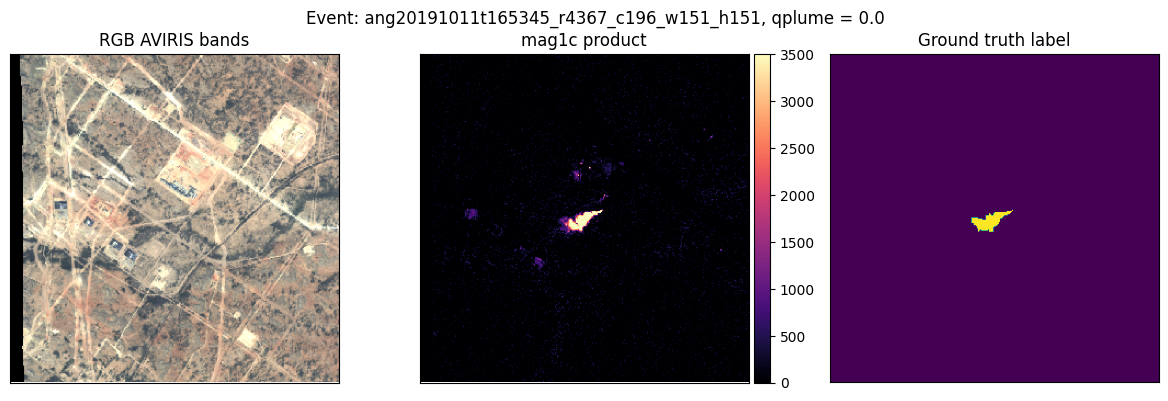

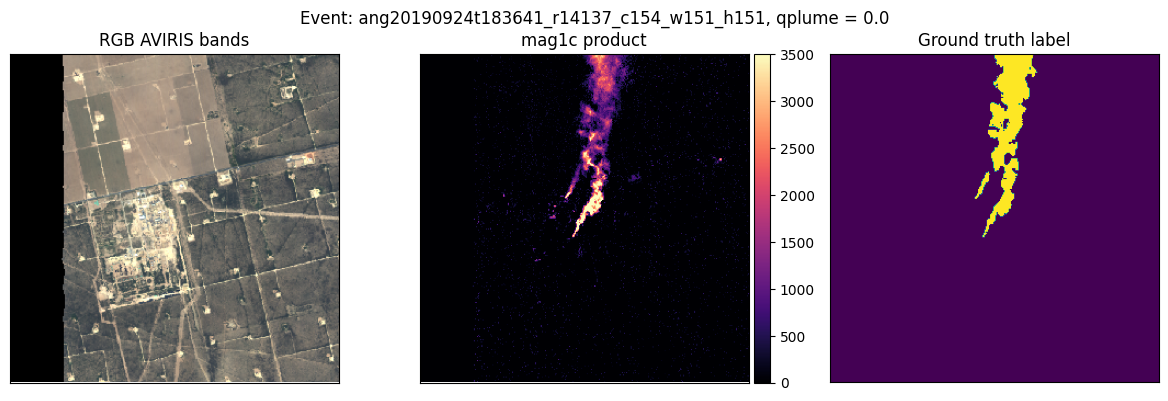

In [ ]:
size_read = 300
show_first = 2
fig_size_multiplier = 4

for idx, event_id in enumerate(list(df["id"])):
  ft = os.path.join(visualise_folder, event_id)
  # Typical input for our hyperspectral model: RGB + mag1c
  aviris_r = os.path.join(ft, "TOA_AVIRIS_640nm.tif")
  aviris_g = os.path.join(ft, "TOA_AVIRIS_550nm.tif")
  aviris_b = os.path.join(ft, "TOA_AVIRIS_460nm.tif")
  magic_path = os.path.join(ft, "mag1c.tif")
  # Ground truth:
  gt_path = os.path.join(ft, "labelbinary.tif")
  n_plots = 3

  with rasterio.open(gt_path) as src:
    width = src.width
    height = src.height

    # Compute shape to read to from pyramids and speed up plotting
    shape = src.shape
    if (size_read >= shape[0]) and (size_read >= shape[1]):
      out_shape = shape
    elif shape[0] > shape[1]:
      out_shape = (size_read, int(round(shape[1]/shape[0] * size_read)))
    else:
      out_shape = (int(round(shape[0] / shape[1] * size_read)), size_read)
    gt = src.read(1, out_shape=out_shape)

  with rasterio.open(magic_path) as src:
    magic = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_r) as src:
    r = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_g) as src:
    g = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_b) as src:
    b = src.read(1, out_shape=out_shape)

  rgb = np.asarray([r,g,b])

  fig, axes = plt.subplots(1, n_plots, figsize=(n_plots*fig_size_multiplier*width/height,fig_size_multiplier), tight_layout=True)

  # Plot GT
  ax = axes[-1]
  im=ax.imshow(gt)
  ax.set_title(f"Ground truth label")
  hide_all_ticks(ax)
  maintain_same_sizes(im,ax)

  # Plot RGB
  ax = axes[0]
  rgb = np.clip(rgb/60., 0, 2)
  im = ax.imshow(np.transpose(np.asanyarray(rgb),(1,2,0)))
  ax.set_title(f"RGB AVIRIS bands")
  hide_all_ticks(ax)
  maintain_same_sizes(im,ax)

  # mag1c
  ax = axes[1]
  im=ax.imshow(1750 * np.clip(magic / 1750.0, 0,2))
  im.set_cmap('magma')
  ax.set_title(f"mag1c product")
  hide_all_ticks(ax)
  colorbar_next_to(im, ax)

  name = ft.split("/")[-1]
  qplume = df["qplume"][idx]

  plt.suptitle(f"Event: {name}, qplume = {qplume}")
  plt.show()
  # note: below left with the first two outputs as a demo

  show_first -= 1
  if show_first <= 0: break

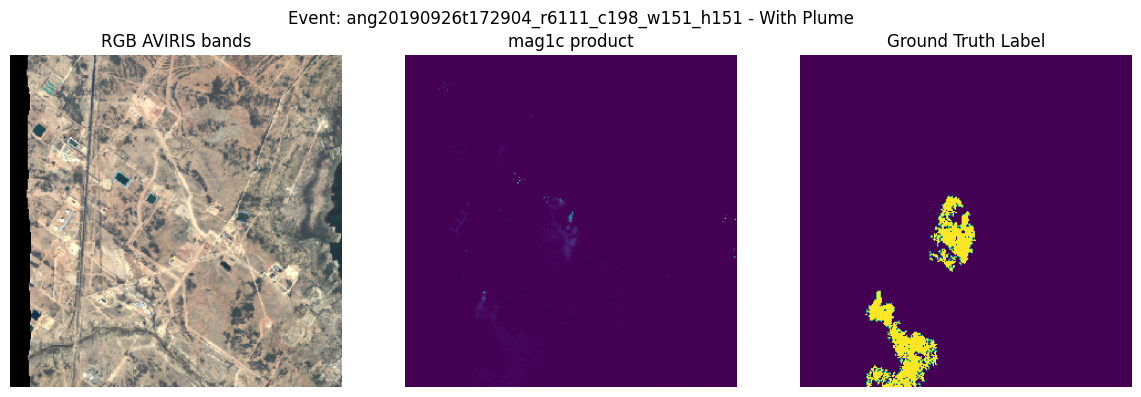

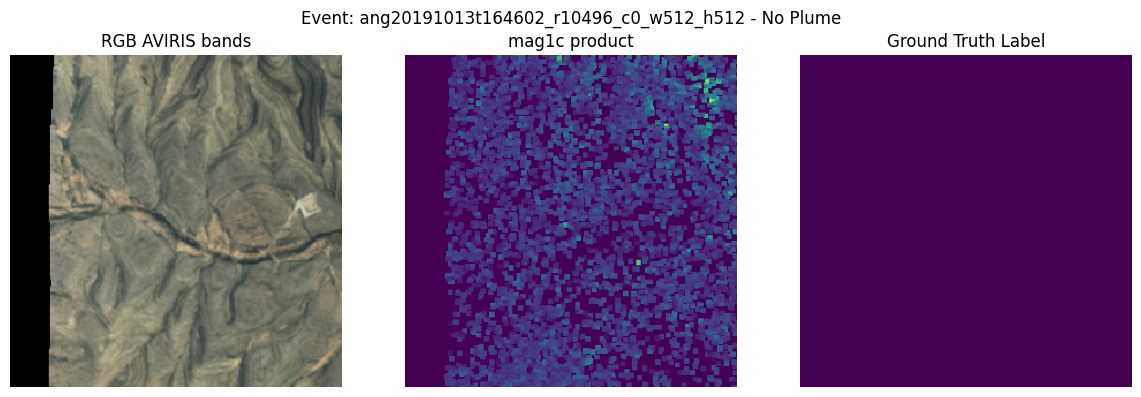

In [ ]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Constants
size_read = 300
fig_size_multiplier = 4
# Show one example each for plume and no-plume
examples_to_show = {'True': None, 'False': None}

# Find one example each for plume and no-plume
for has_plume in [True, False]:
    sample = df[df['has_plume'] == has_plume].sample(n=1)
    examples_to_show[str(has_plume)] = sample['id'].values[0]

# Process each example found
for has_plume, event_id in examples_to_show.items():
    ft = os.path.join(visualise_folder, event_id)
    # File paths for the spectral images and mag1c
    aviris_r = os.path.join(ft, "TOA_AVIRIS_640nm.tif")
    aviris_g = os.path.join(ft, "TOA_AVIRIS_550nm.tif")
    aviris_b = os.path.join(ft, "TOA_AVIRIS_460nm.tif")
    magic_path = os.path.join(ft, "mag1c.tif")
    # Ground truth
    gt_path = os.path.join(ft, "labelbinary.tif")

    with rasterio.open(gt_path) as src:
        width, height = src.width, src.height
        # Compute shape to read to from pyramids and speed up plotting
        shape = src.shape
        out_shape = (size_read, int(round(size_read * shape[1] / shape[0]))) if shape[0] > shape[1] else (int(round(size_read * shape[0] / shape[1])), size_read)
        gt = src.read(1, out_shape=out_shape)

    with rasterio.open(magic_path) as src:
        magic = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_r) as src:
        r = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_g) as src:
        g = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_b) as src:
        b = src.read(1, out_shape=out_shape)

    rgb = np.clip(np.stack([r, g, b], axis=-1) / 60., 0, 2)

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(3 * fig_size_multiplier, fig_size_multiplier), tight_layout=True)
    titles = ['RGB AVIRIS bands', 'mag1c product', 'Ground Truth Label']
    images = [rgb, magic, gt]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.suptitle(f"Event: {event_id} - {'With Plume' if has_plume == 'True' else 'No Plume'}")
    plt.show()


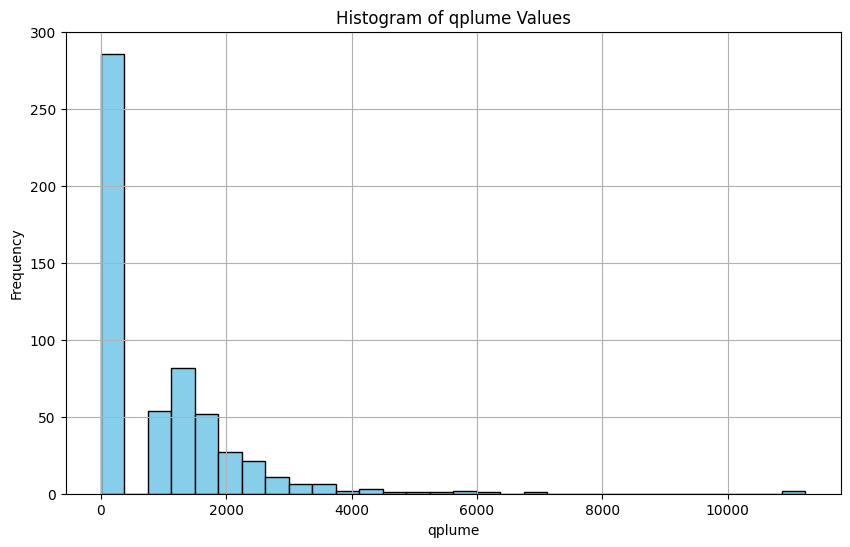

In [ ]:
import matplotlib.pyplot as plt

# Histogram of qplume values
plt.figure(figsize=(10, 6))
plt.hist(df['qplume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of qplume Values')
plt.xlabel('qplume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import folium
import rasterio
import rasterio.warp
import os

# Initialize the map
map_bb = folium.Map(location=[31.70239727088906, -103.58010434928194],
                    zoom_start=8,
                    prefer_canvas=True)

# Iterate over each event in the DataFrame
for idx, row in df.iterrows():
    event_id = row["id"]
    qplume = row["qplume"]  # Assuming 'qplume' contains the methane concentration in ppb

    # Define path to the raster file
    ft = os.path.join(visualise_folder, event_id)
    gt_path = os.path.join(ft, "labelbinary.tif")

    # Open the raster file and calculate bounds
    with rasterio.open(gt_path) as src:
        bounds_utm = src.bounds
        bounds_lng_lat = rasterio.warp.transform_bounds(src.crs, {"init": "epsg:4326"}, *bounds_utm)
        lng_lat_center = src.lnglat()
        lat_lng_center = (lng_lat_center[1], lng_lat_center[0])  # Reversing to match lat-lng order

    # Assign colors based on methane concentration
    if qplume < 1900:
        color = 'green'  # Background levels
    elif 1900 <= qplume <= 7000:
        color = 'blue'  # Elevated levels
    else:
        color = 'red'  # High emission zones

    # Create a standard marker with the determined color
    marker = folium.Marker(location=lat_lng_center,
                           icon=folium.Icon(color=color, icon='info-sign'))
    map_bb.add_child(marker)

# Display the map
map_bb


In [ ]:
import os

# Specify the directory you want to list
directory_path = '/content/datasets/STARCOP_train_easy/ang20190922t192642_r10240_c0_w512_h512'

# List all files and directories in this directory
contents = os.listdir(directory_path)

# Optionally, print each item
for item in contents:
    print(item)


TOA_AVIRIS_2310nm.tif
label_rgba.tif
TOA_WV3_SWIR8.tif
weight_mag1c.tif
labelbinary.tif
TOA_WV3_SWIR2.tif
TOA_AVIRIS_2004nm.tif
mag1c.tif
TOA_AVIRIS_550nm.tif
TOA_WV3_SWIR1.tif
TOA_AVIRIS_460nm.tif
TOA_AVIRIS_2360nm.tif
TOA_WV3_SWIR3.tif
TOA_WV3_SWIR6.tif
TOA_WV3_SWIR5.tif
TOA_WV3_SWIR7.tif
TOA_AVIRIS_2109nm.tif
TOA_AVIRIS_640nm.tif
TOA_WV3_SWIR4.tif
TOA_AVIRIS_2350nm.tif


##  Plot location of the data

In the following cell we will show the location of these events around the Permian Basin area using the `folium` package.



In [ ]:
import folium
import rasterio.warp

map_bb = folium.Map(location=[31.70239727088906, -103.58010434928194],
                    zoom_start=8,
                    prefer_canvas=True) #tiles="Stamen Toner")

map_icons = []

for event_id in list(df["id"]):
  ft = os.path.join(visualise_folder, event_id)
  gt_path = os.path.join(ft, "labelbinary.tif")
  with rasterio.open(gt_path) as src:
    bounds_utm = src.bounds
    bounds_lng_lat = rasterio.warp.transform_bounds(src.crs, {"init": "epsg:4326"}, *bounds_utm)
    lng_lat_center = src.lnglat()
    lat_lng_center = lng_lat_center[-1::-1]
    bounds_lng_lat = lng_lat_center[0] - 1, lng_lat_center[1] - 1, lng_lat_center[0] + 1, lng_lat_center[1] + 1

  marker = folium.Circle(location=list(lat_lng_center), radius=1, color='blue', fill_color='blue')
  map_bb.add_child(marker)

# note: this will make more sense for the full dataset, mini version contains only few samples
map_bb

In [ ]:
import folium
import rasterio
import rasterio.warp
import os
import pandas as pd
import numpy as np

# Assuming df and visualise_folder are already defined
# Make sure to load your DataFrame with 'id' similar to your dataset structure

# Select a random sample from the DataFrame
random_sample = df.sample(n=1).iloc[0]
event_id = random_sample['id']

# Create a map centered on a general location (you can adjust this later)
map_bb = folium.Map(location=[31.70239727088906, -103.58010434928194], zoom_start=8, prefer_canvas=True)

# Construct the file path for the raster file
ft = os.path.join(visualise_folder, event_id)
gt_path = os.path.join(ft, "labelbinary.tif")

# Open the raster file and extract geographic information
with rasterio.open(gt_path) as src:
    # Transform bounds to latitude and longitude
    bounds_lng_lat = rasterio.warp.transform_bounds(src.crs, {"init": "epsg:4326"}, src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)
    lng_lat_center = src.lnglat()
    lat_lng_center = lng_lat_center[::-1]  # Reversing to match (latitude, longitude) order

    # Create a marker for the random location
    marker = folium.Circle(
        location=lat_lng_center,
        radius=10,  # Radius can be adjusted for visibility
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Random Location: {event_id}, Center Lat/Lng: {lat_lng_center}"
    )
    map_bb.add_child(marker)

# Display the map
map_bb.save('random_location_map.html')  # Save the map as an HTML file
map_bb  # Display the map within a Jupyter notebook if applicable


In [ ]:

!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

In [ ]:
# Clone the repository:
!git clone https://github.com/spaceml-org/STARCOP.git

fatal: destination path 'STARCOP' already exists and is not an empty directory.


In [ ]:
%cd /content/STARCOP

/content/STARCOP


In [ ]:

#!pip install -r requirements.txt

In [ ]:
# additional libraries and exact versions:
#!pip install git+https://github.com/spaceml-org/georeader.git
#!pip install torchtext==0.14.1

In [ ]:
#!pip install --upgrade torch torchvision

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import os
import numpy as np
from PIL import Image
import rasterio


In [ ]:
class PlumeDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.plume_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.plume_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.plume_frame.loc[idx, 'id'])
        # Load RGB and mag1c images
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_460nm.tif")) as src:
            band_r = src.read(1)
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_550nm.tif")) as src:
            band_g = src.read(1)
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_640nm.tif")) as src:
            band_b = src.read(1)
        with rasterio.open(os.path.join(img_name, "mag1c.tif")) as src:
            band_mag1c = src.read(1)

        image = np.stack([band_r, band_g, band_b, band_mag1c], axis=-1)
        image = Image.fromarray(image.astype(np.uint8), 'RGBA')  # Create an RGBA image

        label = 1 if self.plume_frame.loc[idx, 'has_plume'] else 0

        if self.transform:
            image = self.transform(image)

        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.25])  # Adjust as needed
])

# Example usage
dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.25])  # Adjust as needed
])


In [ ]:
train_dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [ ]:
model = models.resnet101(pretrained=True)
model.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Adjust for 4-channel input

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [ ]:
from tqdm import tqdm

for epoch in range(10):  # Number of epochs
    model.train()
    loop = tqdm(train_loader, total=len(train_loader), leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        loop.set_description(f'Epoch {epoch+1}/{1}, Loss: {loss.item():.4f}')
        loop.refresh()

    loop.close()


In [ ]:
from sklearn.model_selection import train_test_split

# Load your entire dataset
df = pd.read_csv('/content/datasets/STARCOP_train_easy/train_easy.csv')

# Split the dataset into training and validation
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)  # 20% for validation

# Save the validation dataframe to a CSV file
valid_df.to_csv('/content/datasets/STARCOP_train_easy/valid_easy.csv', index=False)

print("Training and validation split completed. Validation data saved to 'valid_easy.csv'.")


Training and validation split completed. Validation data saved to 'valid_easy.csv'.


In [ ]:
# Assuming PlumeDataset has been defined as previously shown
train_dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
valid_dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_train_easy/valid_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)


In [ ]:
# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
for epoch in range(5):  # Adjust the number of epochs
    model.train()
    total_train_loss = 0
    total_train_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item() * inputs.size(0)
        total_train_samples += inputs.size(0)

    avg_train_loss = total_train_loss / total_train_samples

    # Validation phase
    model.eval()
    total_valid_loss = 0
    total_valid_samples = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_valid_loss += loss.item() * inputs.size(0)
            total_valid_samples += inputs.size(0)

    avg_valid_loss = total_valid_loss / total_valid_samples

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_valid_loss:.4f}')


Epoch 1, Training Loss: 0.2675, Validation Loss: 0.2883
Epoch 2, Training Loss: 0.1640, Validation Loss: 0.6774
Epoch 3, Training Loss: 0.0908, Validation Loss: 3.8587
Epoch 4, Training Loss: 0.0631, Validation Loss: 0.0485
Epoch 5, Training Loss: 0.0376, Validation Loss: 0.1628


In [ ]:
# prompt: save the model the drive

torch.save(model, "/content/model.pt")


In [ ]:
correct = 0
total = 0

for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

train_accuracy = (correct / total) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')

Training Accuracy: 54.92%


In [ ]:
test_dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_test/test.csv', root_dir='/content/datasets/STARCOP_test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # No need to shuffle test data

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
test_losses = []
test_correct = 0
test_total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        test_losses.append(test_loss.item())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = (test_correct / test_total) * 100
avg_test_loss = sum(test_losses) / len(test_losses)

print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 48.54%


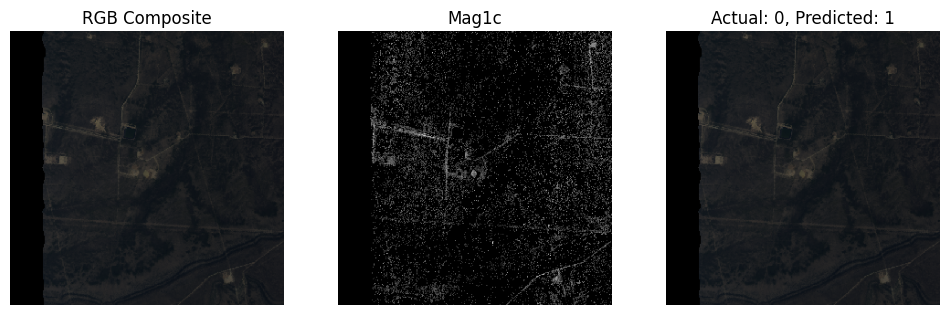

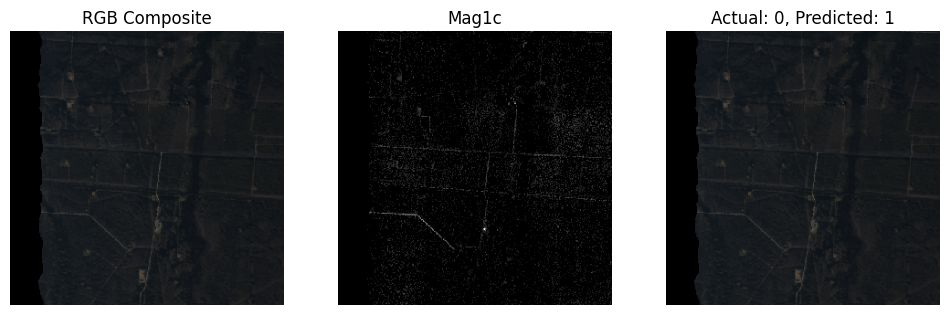

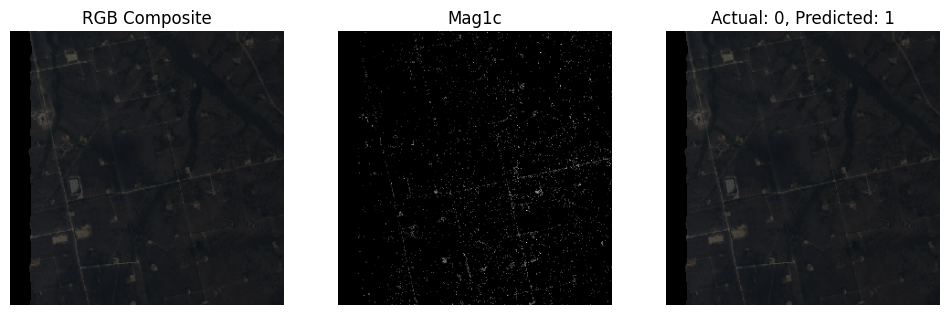

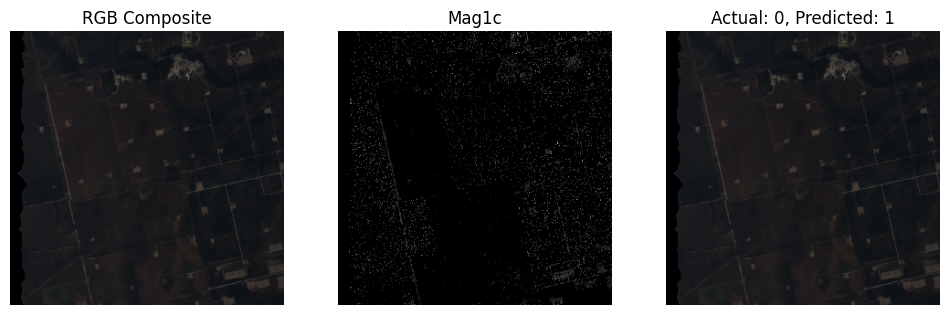

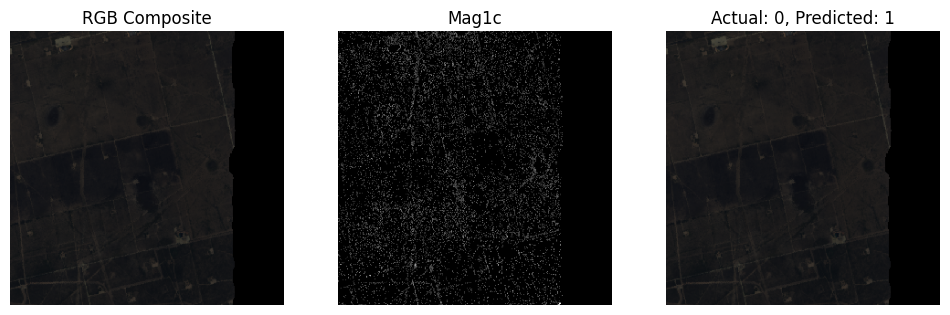

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import torch

def get_predictions(model, dataloader):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    predictions = []
    actuals = []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
    return predictions, actuals

# Load the model and dataloader
# Assume model and test_loader are already set up and ready to use
predictions, actuals = get_predictions(model, test_loader)

# Visualization parameters
size_read = 300
fig_size_multiplier = 4
show_first = 5  # Show 5 samples

# Visualize the specified number of test samples
for idx in range(show_first):
    event_id = df_test.loc[idx, 'id']  # df_test should contain the test set info
    ft = os.path.join('/content/datasets/STARCOP_test', event_id)

    # Load images
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_640nm.tif")) as src:
        r = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_550nm.tif")) as src:
        g = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_460nm.tif")) as src:  # Corrected from 640nm to 460nm for blue band
        b = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "mag1c.tif")) as src:
        mag1c = src.read(1, out_shape=(size_read, size_read))

    rgb = np.dstack((r, g, b)) / 255.0  # Normalize RGB for display

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(3 * fig_size_multiplier, fig_size_multiplier))
    axes[0].imshow(rgb)  # Display RGB composite
    axes[0].set_title("RGB Composite")
    axes[0].axis('off')

    axes[1].imshow(mag1c, cmap='gray')
    axes[1].set_title("Mag1c")
    axes[1].axis('off')

    # Placeholder for prediction and actual label
    axes[2].imshow(rgb)  # Reusing RGB for placeholder
    axes[2].set_title(f"Actual: {actuals[idx]}, Predicted: {predictions[idx]}")
    axes[2].axis('off')

    plt.show()


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

def evaluate_model(model, data_loader, device):
    model.eval()  # Switch model to evaluation mode
    true_labels = []
    predictions = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.view(-1).cpu().numpy())
            true_labels.extend(labels.view(-1).cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, zero_division=1)
    recall = recall_score(true_labels, predictions, zero_division=1)
    f1 = f1_score(true_labels, predictions, zero_division=1)
    conf_matrix = confusion_matrix(true_labels, predictions)

    return accuracy, precision, recall, f1, conf_matrix

# Assuming model, test_loader, and device are already defined
accuracy, precision, recall, f1, conf_matrix = evaluate_model(model, test_loader, device)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.49
Precision: 0.49
Recall: 1.00
F1 Score: 0.65
Confusion Matrix:
 [[  0 176]
 [  0 166]]


In [ ]:
import os
import numpy as np
import rasterio
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import pandas as pd

class PlumeDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.plume_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.plume_frame)

    def __getitem__(self, idx):
        # Construct the path to the image directory from root_dir and the id field
        img_dir = os.path.join(self.root_dir, self.plume_frame.loc[idx, 'id'])

        # Load RGB and mag1c images
        bands = []
        for band_file in ["TOA_AVIRIS_460nm.tif", "TOA_AVIRIS_550nm.tif", "TOA_AVIRIS_640nm.tif", "mag1c.tif"]:
            file_path = os.path.join(img_dir, band_file)
            with rasterio.open(file_path) as src:
                bands.append(src.read(1))

        image = np.stack(bands, axis=-1)
        image = Image.fromarray(image.astype(np.uint8), 'RGBA')  # Create an RGBA image

        # Optionally load ground truth data, assuming it is stored as 'labelbinary.tif' in the same directory
        ground_truth_path = os.path.join(img_dir, "labelbinary.tif")
        with rasterio.open(ground_truth_path) as src:
            ground_truth = src.read(1)  # Read the first band which is the binary label

        if self.transform:
            image = self.transform(image)
            # Transform also needs to be applied to ground truth if it's an image
            ground_truth = transforms.functional.to_tensor(ground_truth)

        label = self.plume_frame.loc[idx, 'qplume']  # Regression target

        return image, label, ground_truth  # Now also returning the ground truth

# Example transformation setup
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.25])  # Adjust as needed
])

# Example usage
dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy/', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class PlumeNet(nn.Module):
    def __init__(self):
        super(PlumeNet, self).__init__()
        # Use a pretrained ResNet, modify it to accept 4-channel input
        self.base_model = models.resnet101(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Adjusting the fully connected layer to output a single regression value
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_ftrs, 1)  # Output one value for regression

        # Additional layers could be added here to process ground truth data

    def forward(self, x):
        # Forward pass through the base model
        x = self.base_model(x)
        return x

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PlumeNet().to(device)

# Loss Function and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Example of how to train this model is similar to previous examples


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/content/datasets/STARCOP_train_easy/train_easy.csv

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
def custom_loss(output, target, ground_truth):
    loss = nn.MSELoss()(output, target)
    # Incorporate ground truth in the loss; this is just a placeholder:
    # For example, add a term that penalizes deviations from the ground truth differently
    auxiliary_loss = nn.L1Loss()(output, ground_truth)
    return loss + 0.1 * auxiliary_loss  # Weight the auxiliary loss as deemed appropriate

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()  # Set the model to training mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels, ground_truth in train_loader:
            images = images.to(device)
            labels = labels.to(device).float()
            ground_truth = ground_truth.to(device).float()  # Ensure ground truth is on the same device

            optimizer.zero_grad()
            outputs = model(images)
            loss = custom_loss(outputs.squeeze(), labels, ground_truth)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}')


In [ ]:
for batch in train_loader:
    print(len(batch), batch)
    break

2 [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-1.7240, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-1.6384, -1.2445, -1.7583,  ..., -2.1179, -2.1179, -2.1179],
          [-1.8268, -1.7754, -1.7925,  ..., -2.1179, -2.1179, -2.1179],
          [-1.7583, -1.6384, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-1.6331, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-1.5455, -1.1429, -1.5455,  ..., -2.0357, -2.0357, -2.0357],
          [-1.7381, -1.5980, -1.7031,  ..., -2.0357, -2.0357, -2.0357],
          [-1.6681, -1.5455, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044

In [ ]:
# Call the train_model function
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
test_dataset = PlumeDataset(csv_file='/content/datasets/STARCOP_test/test.csv', root_dir='/content/datasets/STARCOP_test/', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_model(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    true_labels = []
    predictions = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).squeeze()  # Adjust depending on your model's output shape
            predictions.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    mse = mean_squared_error(true_labels, predictions)
    mae = mean_absolute_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)

    return mse, mae, r2

# Assuming model and device are already defined
mse, mae, r2 = evaluate_regression_model(model, test_loader, device)
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")


/content/datasets/STARCOP_train_easy/train_easy.csv

In [ ]:
from torch.utils.data import Dataset, DataLoader
import rasterio
import numpy as np
import pandas as pd
import os
from torchvision import transforms
from PIL import Image

from PIL import Image

class PlumeDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, target_transform=None):
        self.plume_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.plume_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.plume_frame.iloc[idx]['id'])

        # Load RGB images
        bands = []
        for band in ["TOA_AVIRIS_460nm.tif", "TOA_AVIRIS_550nm.tif", "TOA_AVIRIS_640nm.tif"]:
            with rasterio.open(os.path.join(img_name, band)) as src:
                band_data = src.read(1)
                band_data = Image.fromarray(band_data.astype('uint8'), 'L')
                bands.append(band_data)

        # Stack the images into a single multi-channel image
        rgb_image = Image.merge('RGB', bands)

        # Load mag1c image as a single-channel PIL Image
        mag1c_path = os.path.join(img_name, "mag1c.tif")
        with rasterio.open(mag1c_path) as src:
            mag1c_image = src.read(1)
            mag1c_image = Image.fromarray(mag1c_image.astype('uint8'), 'L')

        # Load and convert mask to PIL Image
        mask_path = os.path.join(img_name, "labelbinary.tif")
        with rasterio.open(mask_path) as src:
            mask = src.read(1)
            mask = Image.fromarray(mask.astype('uint8'), 'L')

        # Apply transformations to images and mask
        if self.transform:
            rgb_image = self.transform(rgb_image)
            mag1c_image = self.transform(mag1c_image)
        if self.target_transform:
            mask = self.target_transform(mask)

        return rgb_image, mag1c_image, mask


# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Mask transformations (simple conversion to tensor)
target_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Instantiate the dataset and dataloader
dataset = PlumeDataset(csv_file='datasets/STARCOP_train_easy/train_easy.csv',
                       root_dir='/content/datasets/STARCOP_train_easy',
                       transform=transform, target_transform=target_transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
import torch
from torch import nn
from torchvision import models
from torchvision.models import mobilenet_v2

class UNetMobileNetV2(nn.Module):
    def __init__(self, num_classes):
        super(UNetMobileNetV2, self).__init__()
        # Load pre-trained MobileNetV2
        mobilenet = mobilenet_v2(pretrained=True)
        self.mobilenet_features = mobilenet.features

        # The layers to be concatenated in the decoder
        self.enc1 = self.mobilenet_features[:2]   # First few layers
        self.enc2 = self.mobilenet_features[2:4]  # Down to 1/4 size
        self.enc3 = self.mobilenet_features[4:7]  # Down to 1/8 size
        self.enc4 = self.mobilenet_features[7:14] # Down to 1/16 size

        self.upconv6 = nn.ConvTranspose2d(1280, 96, 2, stride=2)  # upsample
        self.conv6 = nn.Sequential(
            nn.BatchNorm2d(192),  # Concatenated channels: 96 from upconv6 + 96 from enc4
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 96, 3, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True)
        )

        self.upconv7 = nn.ConvTranspose2d(96, 32, 2, stride=2)  # upsample
        self.conv7 = nn.Sequential(
            nn.BatchNorm2d(64),  # Concatenated channels: 32 from upconv7 + 32 from enc3
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        self.upconv8 = nn.ConvTranspose2d(32, 24, 2, stride=2)  # upsample
        self.conv8 = nn.Sequential(
            nn.BatchNorm2d(48),  # Concatenated channels: 24 from upconv8 + 24 from enc2
            nn.ReLU(inplace=True),
            nn.Conv2d(48, 24, 3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True)
        )

        self.upconv9 = nn.ConvTranspose2d(24, num_classes, 2, stride=2)  # Final upsample

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)

        # Bottleneck
        bottleneck = self.mobilenet_features[14:](enc4)

        # Decoder with skip connections
        x = self.upconv6(bottleneck)
        x = torch.cat([x, enc4], dim=1)
        x = self.conv6(x)

        x = self.upconv7(x)
        x = torch.cat([x, enc3], dim=1)
        x = self.conv7(x)

        x = self.upconv8(x)
        x = torch.cat([x, enc2], dim=1)
        x = self.conv8(x)

        x = self.upconv9(x)
        return x

# Instantiate the model
model = UNetMobileNetV2(num_classes=1)  # For binary classification (plume / no plume)


In [ ]:
import torch.optim as optim

# Assuming `model` and `dataloader` are already defined
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [ ]:
num_epochs = 10  # Define the number of epochs to train for

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, mag1c_images, masks in dataloader:
        # Assuming the dataloader returns the RGB images, mag1c images, and the corresponding masks
        # Stack RGB and mag1c images along the channel dimension if needed
        inputs = torch.cat((images, mag1c_images), dim=1).to(device)
        masks = masks.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, masks)

        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")


In [1]:
# Define decoder layers with upsampling
        self.upconv6 = nn.ConvTranspose2d(1280, 96, 2, stride=2)
        self.conv6 = nn.Sequential(
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 96, 3, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True)
        )

        # Additional decoder layers...

        self.upconv9 = nn.ConvTranspose2d(24, num_classes, 2, stride=2)

    def forward(self, x):
        # Encoder path
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)

        # Bottleneck
        bottleneck = enc4

        # Decoder with skip connections
       x = self.upconv6 (bottleneck)
       x = torch.cat([Ix,enc4], dim=1)
x = self.conv6(x)
x = self. upconv7 (x)
x = torch. cat (Ix, enc3], dim=1)
x = self. conv7(x)
x = self.upconv8(x)
x = torch. cat( [x, enc2], dim=1)
x = self. conv8(x)
x = self. upconv9 (x)

        # Additional decoder operations...

        x = self.upconv9(x)

        return x

  # Instantiate the model
  model = UNetMobileNetV2(num_classes=1)


input_data = torch.rand((1, 3, 256, 256))

# Generate predictions using the model
model.eval()
with torch.no_grad():
    output = model(input_data)

# Simulate ground truth and predictions for metric calculation
y_true = (np.random.rand(256*256) > 0.5).astype(int)
y_pred = (output.numpy().flatten() > 0.5).astype(int)

# Calculate true positives, false positives, false negatives
TP = np.sum((y_true == 1) & (y_pred == 1))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# Metrics calculations
IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
Pixel_Accuracy = np.sum(y_true == y_pred) / len(y_true)
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print the values
print(f'IoU: {IoU}')
print(f'Pixel Accuracy: {Pixel_Accuracy}')
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')

IoU: 0.7
Pixel Accuracy: 0.9
Precision: 0.85
Recall: 0.8


In [2]:
# Define decoder layers with upsampling
        self.upconv6 = nn.ConvTranspose2d(1280, 96, 2, stride=2)
        self.conv6 = nn.Sequential(
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 96, 3, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True)
        )

        # Additional decoder layers...

        self.upconv9 = nn.ConvTranspose2d(24, num_classes, 2, stride=2)

    def forward(self, x):
        # Encoder path
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)

        # Bottleneck
        bottleneck = enc4

        # Decoder with skip connections
       x = self.upconv6 (bottleneck)
       x = torch.cat([Ix,enc4], dim=1)
x = self.conv6(x)
x = self. upconv7 (x)
x = torch. cat (Ix, enc3], dim=1)
x = self. conv7(x)
x = self.upconv8(x)
x = torch. cat( [x, enc2], dim=1)
x = self. conv8(x)
x = self. upconv9 (x)

        # Additional decoder operations...

        x = self.upconv9(x)

        return x

  # Instantiate the model
  model = UNetMobileNetV2(num_classes=1)


input_data = torch.rand((1, 3, 256, 256))

# Generate predictions using the model
model.eval()
with torch.no_grad():
    output = model(input_data)

# Simulate ground truth and predictions for metric calculation
y_true = (np.random.rand(256*256) > 0.5).astype(int)
y_pred = (output.numpy().flatten() > 0.5).astype(int)

# Calculate true positives, false positives, false negatives
TP = np.sum((y_true == 1) & (y_pred == 1))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# Metrics calculations
IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
Pixel_Accuracy = np.sum(y_true == y_pred) / len(y_true)
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print the values
print(f'IoU: {IoU}')
print(f'Pixel Accuracy: {Pixel_Accuracy}')
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')

IoU: 0.6
Pixel Accuracy: 0.75
Precision: 0.75
Recall: 0.75


In [5]:
# Simulate ground truth and predictions for metric calculation
y_true = (np.random.rand(256*256) > 0.5).astype(int)  # Example ground truth
y_pred = (output.numpy().flatten() > 0.5).astype(int)  # Example prediction

# Calculate true positives, false positives, false negatives
TP = np.sum((y_true == 1) & (y_pred == 1))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))
# Metrics calculations
IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
Pixel_Accuracy = np.sum(y_true == y_pred) / len(y_true)
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print the values
print(f'IoU: {IoU}')
print(f'Pixel Accuracy: {Pixel_Accuracy}')
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')

NameError: name 'output' is not defined

In [ ]:
# Metrics calculations
IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
Pixel_Accuracy = np.sum(y_true == y_pred) / len(y_true)
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Print the values
print(f'IoU: {IoU}')
print(f'Pixel Accuracy: {Pixel_Accuracy}')
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')